<a href="https://colab.research.google.com/github/waraporn19/KKU_data_mining/blob/master/Final_Exam_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. จากข้อมูล (```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv```) ใน http://qr.tebs.io/6zqwEf สร้าง model เพื่อทำนาย (Classification) ว่าผลการ search เป็นร้านอาหารหรือไม่(```is_food = = True```) โดยพิจารณาจาก 
- วันในสัปดาห์ที่ทำการ search (```Monday-Sunday```) 
- วันในที่ทำการ search (```1-31```)
- เวลาที่ทำการ search (```1-24```)

หมายเหตุที่ 1 สามารถใช้ function ที่ให้มาช่วยในการทำงานได้
1. ```extract_time()``` ซึ่ง input เป็น ```timestamp``` และ output เป็น ```เวลาที่ทำการ search``` ```วันในที่ทำการ search``` ```วันในสัปดาห์ที่ทำการ search```

2. ```is_food``` ซึ่ง input เป็น ```category_name``` และ ```output``` เป็น คำตอบว่า ```เป็นร้านอาหารหรือไม่```

หมายเหตุที่ 2 ควรเตรียมข้อมูลโดยรวมข้อมูลจาก ตาราง ```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv``` ให้ได้ในรูปแบบ ต่อไปนี้
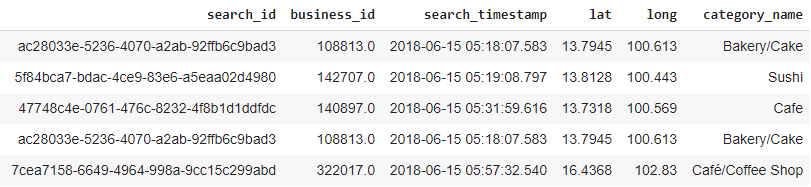

(200 คะแนน)

In [1]:
# เรียกใช้ฟังก์ชั่น pandas
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#ให้ข้อมูลที่อยู่ใน Drive แทนด้วยชื่อ path
path = '/content/drive/My Drive/DM_2020'

In [6]:
import os
import pandas

In [9]:
w_restaurant= os.path.join(path,'w_restaurant.csv')  #สร้างที่อยู่โดยใช้ os.path.join
search_click= os.path.join(path,'search_click.csv')
search_request= os.path.join(path,'search_request.csv')

In [11]:
w_restaurant_df = pandas.read_csv(w_restaurant)
w_restaurant_df.head()

,Unnamed: 0,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,0,2,นครินทร์ทันตกรรม,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,5,วัดโลกยสุธาราม,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6,นันท์คาราโอเกะ,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,Café/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


In [12]:
search_click_df = pandas.read_csv(search_click)
search_click_df.head()

,Unnamed: 0,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,0,2018-06-15 05:11:38.914154,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2222397704154000,True
1,1,2018-06-15 06:30:51.277476,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,460838273476000,True
2,2,2018-06-15 06:32:09.558025,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2581491438025000,True
3,3,2018-06-15 06:00:59.820390,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1404578985390000,True
4,4,2018-06-15 05:23:36.828525,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,933358625525000,True


In [13]:
search_request_df = pandas.read_csv(search_request)
search_request_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


In [68]:
w_restaurant_df.shape 
# .shape เช็คว่าข้อมูลครบทุกแถวทุกคอลัมมั้ย


(246847, 33)

In [71]:
search_click_df.shape 
# .shape เช็คว่าข้อมูลครบทุกแถวทุกคอลัมมั้ย

(7882037, 7)

In [70]:
search_request_df.shape 
# .shape เช็คว่าข้อมูลครบทุกแถวทุกคอลัมมั้ย

(10004357, 10)

#เช็คดูว่าตารางเรามี missimg

In [72]:
# .isnull ดูว่าแต่ละช่องในตารางมีช่องว่างรึป่าว
search_click_df.isnull()

,Unnamed: 0,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
7882032,False,False,False,False,False,False,False
7882033,False,False,False,False,False,False,False
7882034,False,False,False,False,False,False,False
7882035,False,False,False,False,False,False,False


In [74]:
# .isnull ดูว่าแต่ละช่องในตารางมีช่องว่างรึป่าว
w_restaurant_df.isnull()

,Unnamed: 0,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246842,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,True,True,True,True
246843,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,False,True,True,True,True
246844,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True,True
246845,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True,True


In [75]:
# .isnull ดูว่าแต่ละช่องในตารางมีช่องว่างรึป่าว
search_request_df.isnull()

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,False,False,False,False,True,True,False,False,False,False
1,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
10004352,False,False,False,False,True,False,False,False,True,True
10004353,False,False,False,False,True,True,False,False,True,True
10004354,False,False,False,False,True,True,False,False,True,True
10004355,False,False,False,False,True,False,False,False,True,True


In [76]:
w_restaurant_df.isnull().any()
# .any นำข้อมูลมา or คือ T or T = T, T or F = F เพื่อหาว่าในคอลัมไหนที่มี True อยู่ ก็จะขึ้น True
# .all นำข้อมูลมา and 
# ถ้า มี .any().any() สองตัว คือดูว่าตารางมี misssing หรือไม่

Unnamed: 0                 False
id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains            True
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_rest

In [77]:
search_request_df.isnull().any()

Unnamed: 0          False
search_id           False
search_timestamp    False
user_agent          False
q                    True
user_id              True
session_id          False
number_of_result    False
lat                  True
long                 True
dtype: bool

#การลบ missing

In [78]:
w_restaurant_df_nm =w_restaurant_df.dropna()
# .dropna()  คือ ลบ missing ลบแล้ว ให้อยู่ในตาราง search_click_df_nm

In [79]:
# ดูว่าตารางยังมี missing อยู่ไหม
w_restaurant_df_nm.isnull().any().any()

False

In [80]:
# ดูว่าข้อมูลหายไปมากน้อยเท่าไร
print(w_restaurant_df.shape)
print(w_restaurant_df_nm.shape)

(246847, 33)
(4, 33)


#ตรวจสอบว่าการลบข้อมูล missing ออก

In [81]:
size_before_drop = w_restaurant_df.shape[0]
size_after_drop = w_restaurant_df.dropna().shape[0]
print(f'size_before_drop = {size_before_drop} \nsize_after_drop = {size_after_drop}\
  \nwhich is {100*((size_before_drop - size_after_drop)/size_before_drop)}')

size_before_drop = 246847 
size_after_drop = 4  
which is 99.99837956304918


In [82]:
# .flillna(ค่าที่จะเติม) ใส่ค่าที่ missing 
w_restaurant_df[['number_of_chains']] = w_restaurant_df[['number_of_chains']].fillna(0) #fillna(0) ร้านส่วนใหญ่ไม่มีสาขาย่อย

In [83]:
w_restaurant_df.isnull().any()

Unnamed: 0                 False
id                         False
name                       False
domain_id                  False
closed                     False
city_name                  False
zipcode                     True
geohash                    False
new_open                   False
weighted_average_rating    False
number_of_chains           False
number_of_bookmarks         True
number_of_reviews          False
number_of_product_tags     False
total_number_of_views      False
number_of_checkins         False
number_of_menu_groups      False
number_of_menu_photos      False
category_name              False
price_range                 True
avg_price                   True
parking                     True
credit_card_accepted        True
good_for_groups             True
good_for_kids               True
bookable                    True
best_of_wongnai             True
wifi                        True
number_of_seats             True
music_venue                 True
hotel_rest

In [84]:
new_table = w_restaurant_df[['name','city_name','avg_price']]
new_table

,name,city_name,avg_price
0,นครินทร์ทันตกรรม,Samut Songkhram,NaN
1,Corner House,Bangkok Metropolitan Region,NaN
2,วัดโลกยสุธาราม,Phra Nakhon Si Ayutthaya,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
...,...,...,...
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN
246844,สเต็กแม่&กาแฟลูก,Bangkok Metropolitan Region,NaN
246845,Mom Made,Nakhon Si Thammarat,NaN


In [89]:
selected_list = new_table['city_name']=='Bangkok '
selected_list
# list เฉพาะตัวที่เราต้องการ: colume 0 ไม่มี Bangkok Metropolitan Region เลยขึ้น False แสดงว่าข้อมูลแถวนี้เราไม่เอา

0         False
1         False
2         False
3         False
4         False
          ...  
246842    False
246843    False
246844    False
246845    False
246846    False
Name: city_name, Length: 246847, dtype: bool

In [92]:
bkk_table = new_table[new_table['city_name']=='Bangkok Metropolitan Region']
bkk_table

,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,NaN
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,NaN
4,Buono Caffe,Bangkok Metropolitan Region,NaN
7,Sazanami,Bangkok Metropolitan Region,NaN
10,Rotee Me Chabu,Bangkok Metropolitan Region,NaN
...,...,...,...
246835,ร้านครัวแกงป่า,Bangkok Metropolitan Region,NaN
246840,โตข้าวต้มปลา,Bangkok Metropolitan Region,NaN
246842,Sushi Tama,Bangkok Metropolitan Region,NaN
246843,สะบายดี คาราโอเกะ,Bangkok Metropolitan Region,NaN


In [93]:
bkk_table_dp = bkk_table.dropna()
bkk_table_dp

,name,city_name,avg_price
67,เล็กกุ้งเผา,Bangkok Metropolitan Region,375.0
134,Cafe Cha,Bangkok Metropolitan Region,175.0
247,Masterpiece clinic,Bangkok Metropolitan Region,1500.0
319,Chaba Nails & Eyelashes Pro,Bangkok Metropolitan Region,375.0
382,Panlee Bakery,Bangkok Metropolitan Region,175.0
...,...,...,...
246458,Farm Design,Bangkok Metropolitan Region,50.0
246472,The Andaman,Bangkok Metropolitan Region,1500.0
246508,ZEN Japanese Restaurant,Bangkok Metropolitan Region,375.0
246666,ต้นเครื่อง,Bangkok Metropolitan Region,375.0


In [94]:
bkk_table_dp_avg_price = bkk_table_dp['avg_price']
bkk_table_dp_avg_price

67         375.0
134        175.0
247       1500.0
319        375.0
382        175.0
           ...  
246458      50.0
246472    1500.0
246508     375.0
246666     375.0
246721     375.0
Name: avg_price, Length: 3001, dtype: float64

In [95]:
bkk_table_dp_avg_price.mean()

392.5854715094968

In [96]:
bkk_table[['avg_price']] = bkk_table[['avg_price']].fillna(bkk_table_dp_avg_price.mean()) 
bkk_table.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,name,city_name,avg_price
1,Corner House,Bangkok Metropolitan Region,392.585472
3,นันท์คาราโอเกะ,Bangkok Metropolitan Region,392.585472
4,Buono Caffe,Bangkok Metropolitan Region,392.585472
7,Sazanami,Bangkok Metropolitan Region,392.585472
10,Rotee Me Chabu,Bangkok Metropolitan Region,392.585472


In [98]:
merged_table = search_click_df.merge, w_restaurant_df.merge(search_request_df,how='left',left_on='business_id',right_on='id')
merged_table

KeyError: ignored

In [102]:
 #จากตาราง  w_restaurant    เป็นร้านอาหารหรือไม่
 w_restaurant_df.groupby('category_name').count().sort_values('name')

,Unnamed: 0,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
category_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Zoo/Amusement Park,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
University,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
City Pillar Shrine,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Exhibition,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Science Center,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
North East,12623,12623,12623,12623,12623,12623,8359,12623,12623,12623,12623,7995,12623,12623,12623,12623,12623,12623,10473,125,7468,4882,2640,2234,1840,12,2276,3242,215,198,156,473
Quick Meal,15506,15506,15506,15506,15506,15506,9086,15506,15506,15506,15506,9852,15506,15506,15506,15506,15506,15506,14756,161,10522,6798,3195,2982,2326,33,2936,4273,243,453,212,589
Café/Coffee Shop,25060,25060,25060,25060,25060,25060,15733,25060,25060,25060,25060,16836,25060,25060,25060,25060,25060,25060,22623,361,17088,10633,6887,6356,4573,42,11048,7823,685,942,637,946


In [ ]:
import datetime
def extract_time(datetime_s):
    EX_date = datetime.datetime.strptime(datetime_s, "%Y-%m-%d %H:%M:%S.%f")
    return EX_date.hour, EX_date.day, get_day(EX_date.weekday()) 

def get_day(D):
    weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    return weekdays[D] 

def is_food(inp):
    food_list = ['Vegeterian','Sushi','Sukiyaki/Shabu','Street Food/Food Stands','Steak House/Barbeque','Southern Food','Seafood','Ramen','Quick Meal','Pizza','Northern Food','Noodles','Mexican','Korean',
             'Japanese','Italian','Izakaya','Healthy Food','German Food','Fusion Food','French','Food Truck','Fastfood','Dim Sum','Delivery Only','Chinese','Cafe','Café/Coffee Shop','Buffet',
             'Breakfast/Brunch','Bakery/Cake','Barbeque/Grill','American']
    return inp in food_list

2. จากข้อมูล (```reduced_marketbasket.csv```) ใน http://qr.tebs.io/6zqwEf ให้เปรียบเทียบ รูปแบบ การซื้อที่น่าสนใจเป็นราย Transaction ของประชากรใน ประเทศ ```United Kingdom``` กับ ประเทศอื่นๆ (```'Country'!='United Kingdom'```)

(80 คะแนน)

In [18]:
# เรียกใช้ฟังก์ชั่น pandas
import pandas as pd

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#ให้ข้อมูลที่อยู่ใน Drive แทนด้วยชื่อ path
path = '/content/drive/My Drive/DM_2020'

In [24]:
import os
data = pd.read_csv(os.path.join(path,'reduced_marketbasket.csv'),encoding='latin1')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [25]:
#จากตาราง data เราจะ groupby เพื่อดูว่า แต่ละ country นั้นขายสินค้าได้ประเทศละกี่ชิ้น.sort_values('Quantity') เรียง Quantity จากน้อยไปหามาก 
# ,ascending=False) เรียงจากมากไปน้อย
data.groupby('Country').sum().sort_values('Quantity')

,Quantity,UnitPrice,CustomerID
Country,,,
Saudi Arabia,75,2.411000e+01,1.256500e+05
Bahrain,260,8.657000e+01,2.100270e+05
RSA,352,2.481000e+02,7.218680e+05
Brazil,356,1.426000e+02,4.086080e+05
Lebanon,386,2.424400e+02,5.743800e+05
European Community,497,2.940500e+02,9.215880e+05
Czech Republic,592,8.815000e+01,3.834300e+05
Lithuania,652,9.944000e+01,5.366200e+05
Malta,944,6.660100e+02,2.158496e+06


In [65]:
!pip install apyori

In [66]:
from apyori import apriori

In [40]:
data.groupby('CustomerID').sum

<bound method GroupBy.sum of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7f96d87d7748>>

In [41]:


data.groupby('CustomerID').sum().sort_values('Quantity')

,Quantity,UnitPrice
CustomerID,,
16546.0,-303,53.03
15823.0,-283,85.19
14213.0,-244,24.45
16742.0,-189,472.65
16252.0,-158,67.10
...,...,...
18102.0,64122,5159.73
17450.0,69029,3320.09
14911.0,77180,31060.66


In [53]:

# .apply(list) คือ groupby แล้วไม่ต้องเอาไป Sum หรือทำอะไร ให้มันอยู่ในลิส 
# ตัว C หน้าเลข คือมีการลบ บางรายการในใบเสร็จนั้น
transecs =data.groupby('Country')['CustomerID'].apply(list)
transecs

Country
Australia               [12431.0, 12431.0, 12431.0, 12431.0, 12431.0, ...
Austria                 [12865.0, 12370.0, 12370.0, 12370.0, 12370.0, ...
Bahrain                 [nan, nan, 12355.0, 12355.0, 12355.0, 12355.0,...
Belgium                 [12395.0, 12395.0, 12395.0, 12395.0, 12395.0, ...
Brazil                  [12769.0, 12769.0, 12769.0, 12769.0, 12769.0, ...
Canada                  [15388.0, 15388.0, 15388.0, 15388.0, 15388.0, ...
Channel Islands         [14932.0, 14932.0, 14932.0, 14932.0, 14932.0, ...
Cyprus                  [12370.0, 12370.0, 12370.0, 12370.0, 12370.0, ...
Czech Republic          [12781.0, 12781.0, 12781.0, 12781.0, 12781.0, ...
Denmark                 [12429.0, 12429.0, 12429.0, 12429.0, 12429.0, ...
EIRE                    [14911.0, 14911.0, 14911.0, 14911.0, 14911.0, ...
European Community      [15108.0, 15108.0, 15108.0, 15108.0, 15108.0, ...
Finland                 [12348.0, 12348.0, 12348.0, 12348.0, 12348.0, ...
France                  [12583

In [112]:
list(apriori(transecs, min_support = 0.07, min_confidence = 0.7)) #เหลือ 3 คู่ ว่าคู่ไหนขายดีกว่ากัน   ประชากร ในประเทศ United Kingdom กับ ประเทศอื่นๆ ซื้อสินค้ามากกว่ากันเพื่อดูความสัมพันธ์นำไปทำกลยุทธ์ทางการตลาดประเทศ United Kingdom กับ ประเทศอื่นๆ  มีการซื้อสินค้าประเทศไหนมาก

KeyboardInterrupt: ignored

3. เขียนคำศัพท์ที่ได้เรียนในวิชาพร้อมทั้งคำนิยามที่เป็นคำพูดของนักศึกษาเอง (ห้าม search google) 20 คำ

(คำละ 0.5 คะแนน)

.head = (‘จำนวน row ที่อยากได้ออกมาแสดงนับจากแถวบนสุด’) เช่น dt.head(5)

matplotlib =  เพื่อวาดกราฟ โดยแทนชื่อ matplotlib ด้วย plt

Dimention อธิบายตัวมุมมองของข้อมูล

Centrality =  กาารหาค่ากลาง เรียกดูข้อมูลใน table1
 
describe() = การอธิบายข้อมูลด้วยค่ากลาง

.split = คำสั่งแยก การใส่ (’,’) คือการตัด ,

.shape  = บอกจำนวน แถว หลัก

.isnull() = เช็คของมูลที่มีค่าเป็น Null ( True คือมี Null)

.notnull() = วิธีเช็คข้อมูล ที่ไม่เป็นเป็น Null

.query = วิธีกรองข้อมูลแบบมีเงื่อนไข

np2.shape  = บอกจำนวนแถวและหลัก ของ เมตริกซ์



.agg('mean') = การหาค่า mean, max , sum (aggregate)ทั้ง dataframe

.unique() = การหาค่าข้อมูลที่ไม่ซ้ำกันในแต่ละ column ex. data['column'].unique()

.replace()  = การแทนค่าข้อมูลในตาราง ex data.replace(1,50) เลข 1 ให้แทนด้วย 50

Slicing list[::-1] ย้อน list จากตัวสุดท้าย มาจนถึงตัวแรก

Fact table = เก็บ/ใช้อธิบายตัวที่เราสนใจจริง ๆ

Data Cube  = ข้อมูล 1 ตัวที่ถูกมองหลายมุม

hierarchy =  ลำดับชั้นดูได้หลายมุมมอง  โลก ทวีป  ประเทศ ขึ้นลงได้

roll up  = คือยุปรวมกันหลายเมือง - ประเทศ - ทวีป

drill down = การซูมดูรายละเอียดเกี่ยวข้อมูลเชิงลึกเช่น ปี ไตรมาสต์ สัปดาห์ วัน

.apply(list) = groupby แล้วไม่ต้องเอาไป Sum หรือทำอะไร ให้มันอยู่ในลิส 

KNN k =3 หาตัวที่ใกล้ที่สุด3 ตัว

weight = เช่น uniformให้น้ำหนักเพื่อนบ้านเท่ากัน

distance =  เช่น คนใกล้น้ำหนักมากกว่า

metric =  ระยะทาง ' minkowski'ขึ้นอยู่กับประเภทของข้อมูลที่เรากำลังวิเคราะห์อยู่

pivot = การ transpost

Numpy Array =เกี่ยวกับตัวเลข